<a href="https://colab.research.google.com/github/Sandermi99/MEDT4165/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Exercise 2 part 1 and 2!

In [2]:
#Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [3]:
#Part 1- Transmission

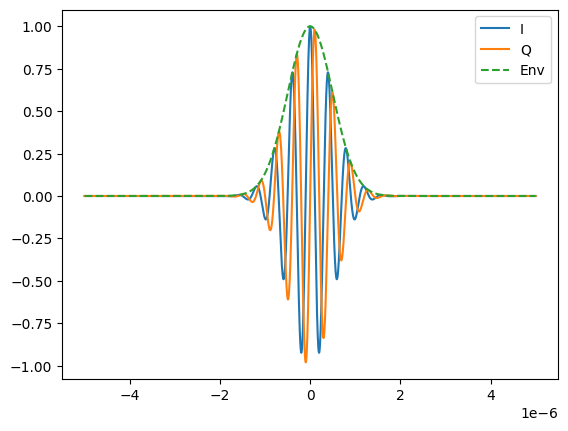

In [9]:


#Defining variables

fs = 250e6
f0 = 2.5e6
bw = 0.3
bw_abs = f0*bw
T = 10e-6
N = int(T*fs)
t_vec = (np.arange(N) - N/2) / fs

#Generating the gauss pulse and plotting it

i, q, e = signal.gausspulse(t_vec, bw=bw, fc=f0, retquad = True, retenv = True)

plt.plot(t_vec, i, label = "I")
plt.plot(t_vec, q,label = "Q")
plt.plot(t_vec, e, "--" ,label = "Env")
plt.legend()
plt.show()



/tmp/ipython-input-30936626.py:7: RuntimeWarning: divide by zero encountered in log10
  Ps_Y_shiftet_dB = 10*np.log10(Ps_Y_shiftet)


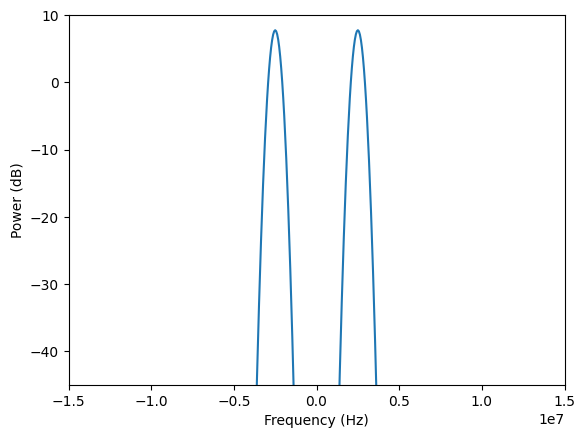

In [16]:
# Power spectrum of the gaussian pulse

Nfft = 4096
Y = np.fft.fft(i, Nfft)
Ps_Y = (1/Nfft) * np.abs(Y)**2
Ps_Y_shiftet = np.fft.fftshift(Ps_Y)
Ps_Y_shiftet_dB = 10*np.log10(Ps_Y_shiftet)
f = np.fft.fftshift(np.fft.fftfreq(Nfft, 1/fs))

plt.plot(f, Ps_Y_shiftet_dB)
plt.ylabel("Power (dB)")
plt.xlabel("Frequency (Hz)")
plt.ylim(-45, 10)
plt.xlim(-15e6, 15e6)
plt.show()